### Import the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import classification_report, accuracy_score

### Load the dataset:

In [ ]:
data = pd.read_csv('boston_house_prices.csv')

### Features:

CRIM: Per capita crime rate by town.

This feature represents the rate of crime in each town, where a higher value indicates a higher crime rate.
ZN: Proportion of residential land zoned for large lots.

ZN represents the proportion of land in each town that is zoned for large residential lots, which typically means lower housing density.
INDUS: Proportion of non-retail business acres per town.

INDUS represents the proportion of land in each town that is used for non-retail business purposes, such as manufacturing or industrial activities.
CHAS: Charles River dummy variable (1 if tract bounds river, 0 otherwise).

This is a binary variable that indicates whether a town's tract bounds the Charles River. It's 1 if it does and 0 if it doesn't.
NOX: Nitrogen oxide concentration (parts per 10 million).

NOX represents the concentration of nitrogen oxide in the air, which is a measure of air pollution.
RM: Average number of rooms per dwelling.

RM represents the average number of rooms in houses within each town.
AGE: Proportion of owner-occupied units built before 1940.

AGE represents the proportion of houses in each town that were built before 1940. It indicates the age of the housing stock.
DIS: Weighted distance to employment centers.

DIS represents the weighted average distance from each town to employment centers or job locations.
RAD: Index of accessibility to radial highways.

RAD is an index that measures the accessibility of each town to radial highways. A higher value indicates better highway access.
TAX: Property tax rate (per $10,000).

TAX represents the property tax rate for each town, measured per $10,000 of property value.
PTRATIO: Pupil-teacher ratio by town.

PTRATIO represents the average pupil-teacher ratio in the public schools of each town.

B is a measure that combines information about the proportion of African American residents in each town, with higher values indicating a higher proportion of African American residents.
LSTAT: Percentage of lower-status population.

LSTAT represents the percentage of the population in each town that is considered to have lower socioeconomic status.


In [ ]:
# Display the first few rows of the dataset
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# Summary statistics of the dataset
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


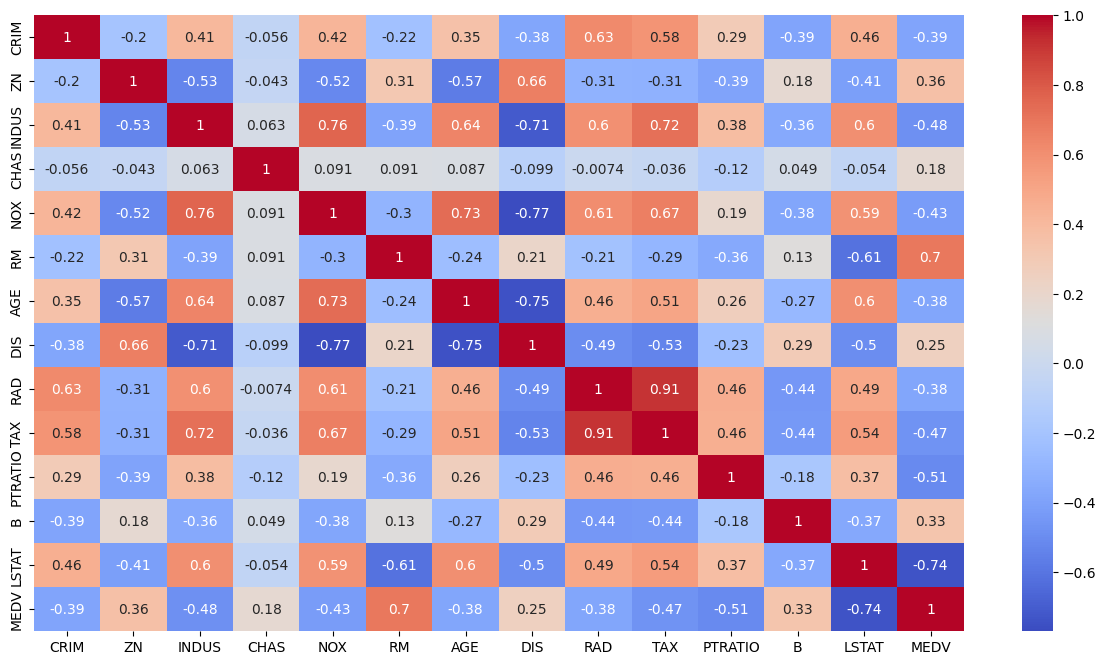

In [ ]:
# Visualize the correlation between features and the target variable
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

### Select the features and target variable

In [ ]:
# Select the features and target variable
X = data[['RM', 'LSTAT']]
y = data['MEDV']

### Add a constant to the features for the intercept term:

In [ ]:
X = sm.add_constant(X)

### Create and fit the linear regression model:

In [ ]:
model = sm.OLS(y, X).fit()

### Get the model summary:

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.952e+31
Date:                Wed, 06 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:57:49   Log-Likelihood:                 15272.
No. Observations:                 506   AIC:                        -3.054e+04
Df Residuals:                     503   BIC:                        -3.052e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.883e-15   9.82e-15      0.803      0.4

# ACTIVITY:

# ***Play around with variables sa x-axis & y-axis. Make sure that the R-squared is close to the percentage "1.00". ***

### Predicting with a new data

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Create a new DataFrame with the desired feature values
new_data = pd.DataFrame({'RM': [5.10], 'LSTAT': [6.2]})

# Add a constant (intercept)
new_data_with_const = sm.add_constant(new_data, has_constant='add')

# Use the fitted model to make the prediction
prediction = model.predict(new_data_with_const)

# The prediction variable now contains the predicted target value
print(f"The predicted target value is: {prediction[0]}")

The predicted target value is: 5.10000000000001
